### Do the measurement of the line peaks

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as c
from astropy.io import fits

In [27]:
## FITS data
hdu = fits.open("goodsn-42-G141_01060.2D.fits")
sci_d = hdu['SCI'].data
sci_h = hdu['SCI'].header
wl = np.linspace(1*sci_h['CRVAL1'],1*sci_h['CRVAL1'] + ((sci_h['NAXIS1']-1)*sci_h["CD1_1"]),sci_h['NAXIS1'])

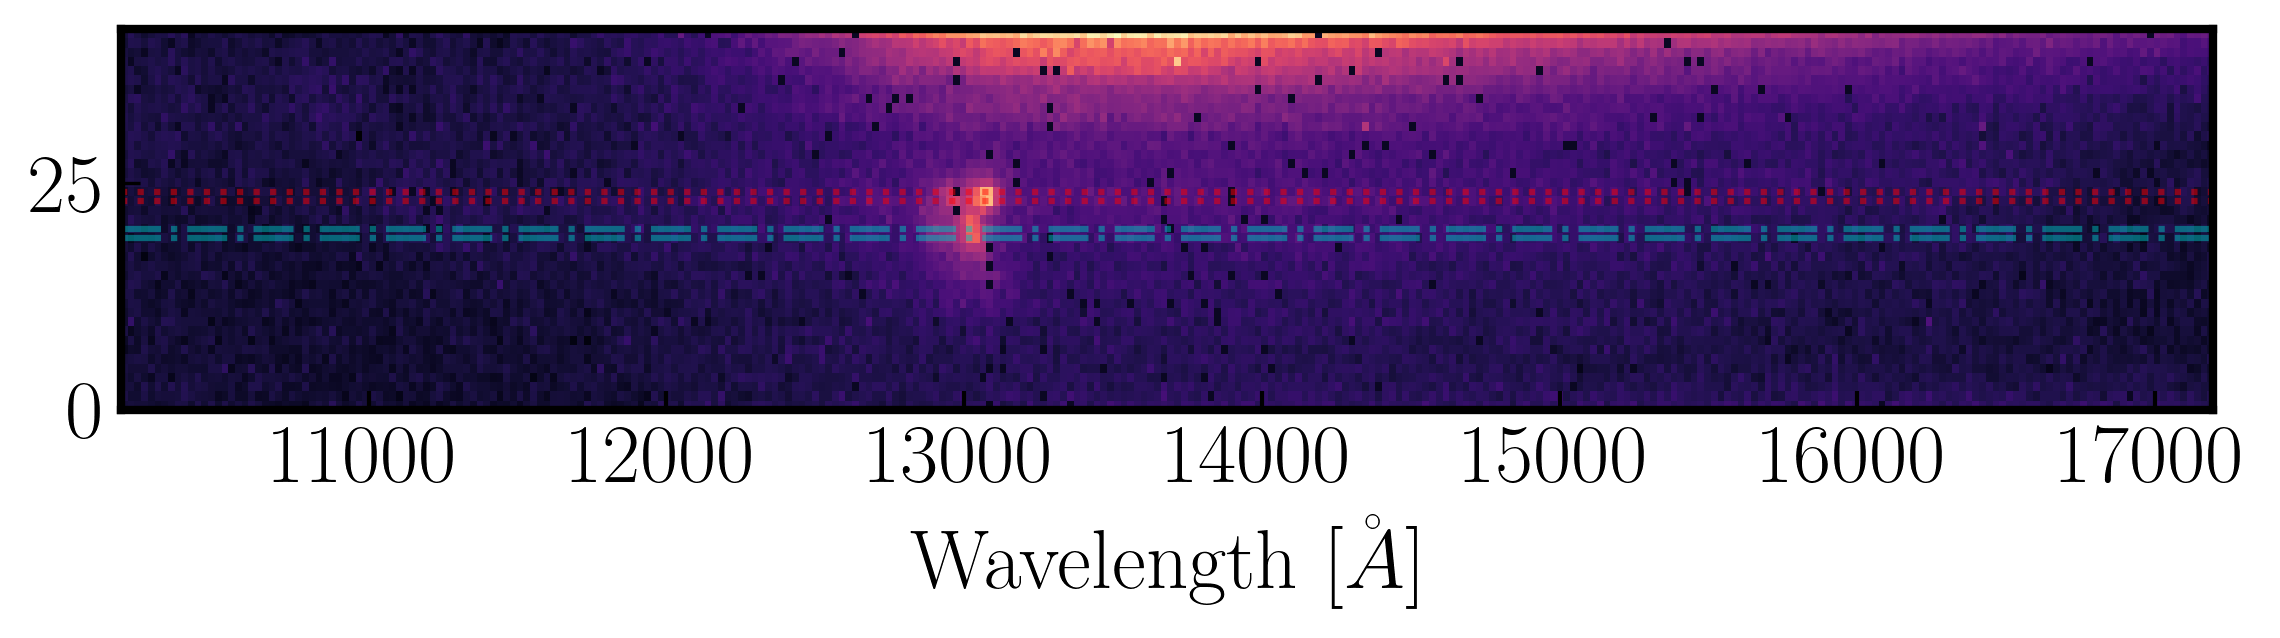

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(sci_d,origin='lower',extent=[wl[0],wl[-1],0,42])
ax.set_aspect(sci_h['NAXIS1']/sci_h['NAXIS2']*4)
ax.set_xlabel('Wavelength [$\AA$]')
ax.axhline(24,c='r',ls=':',alpha=0.5)
ax.axhline(23,c='r',ls=':',alpha=0.5)
ax.axhline(20,c='c',ls='-.',alpha=0.5)
ax.axhline(19,c='c',ls='-.',alpha=0.5)
plt.show()

In [122]:
## These are the rest frame line values for OIII
O3_A = 5006.843 ## in angstroms!
O3_B= 4958.911 ## in angstroms!
z = 1.6095

## Convert to observer frame
O3_A_obs = O3_A*(1+z)
O3_B_obs = O3_B*(1+z)

## Observed peaks of OIII line
ns = np.nanmean(hdu['SCI'].data[23:25,110:140],axis=0)
ss = np.nanmean(hdu['SCI'].data[19:21,110:140],axis=0)
wl_s = wl[110:140]

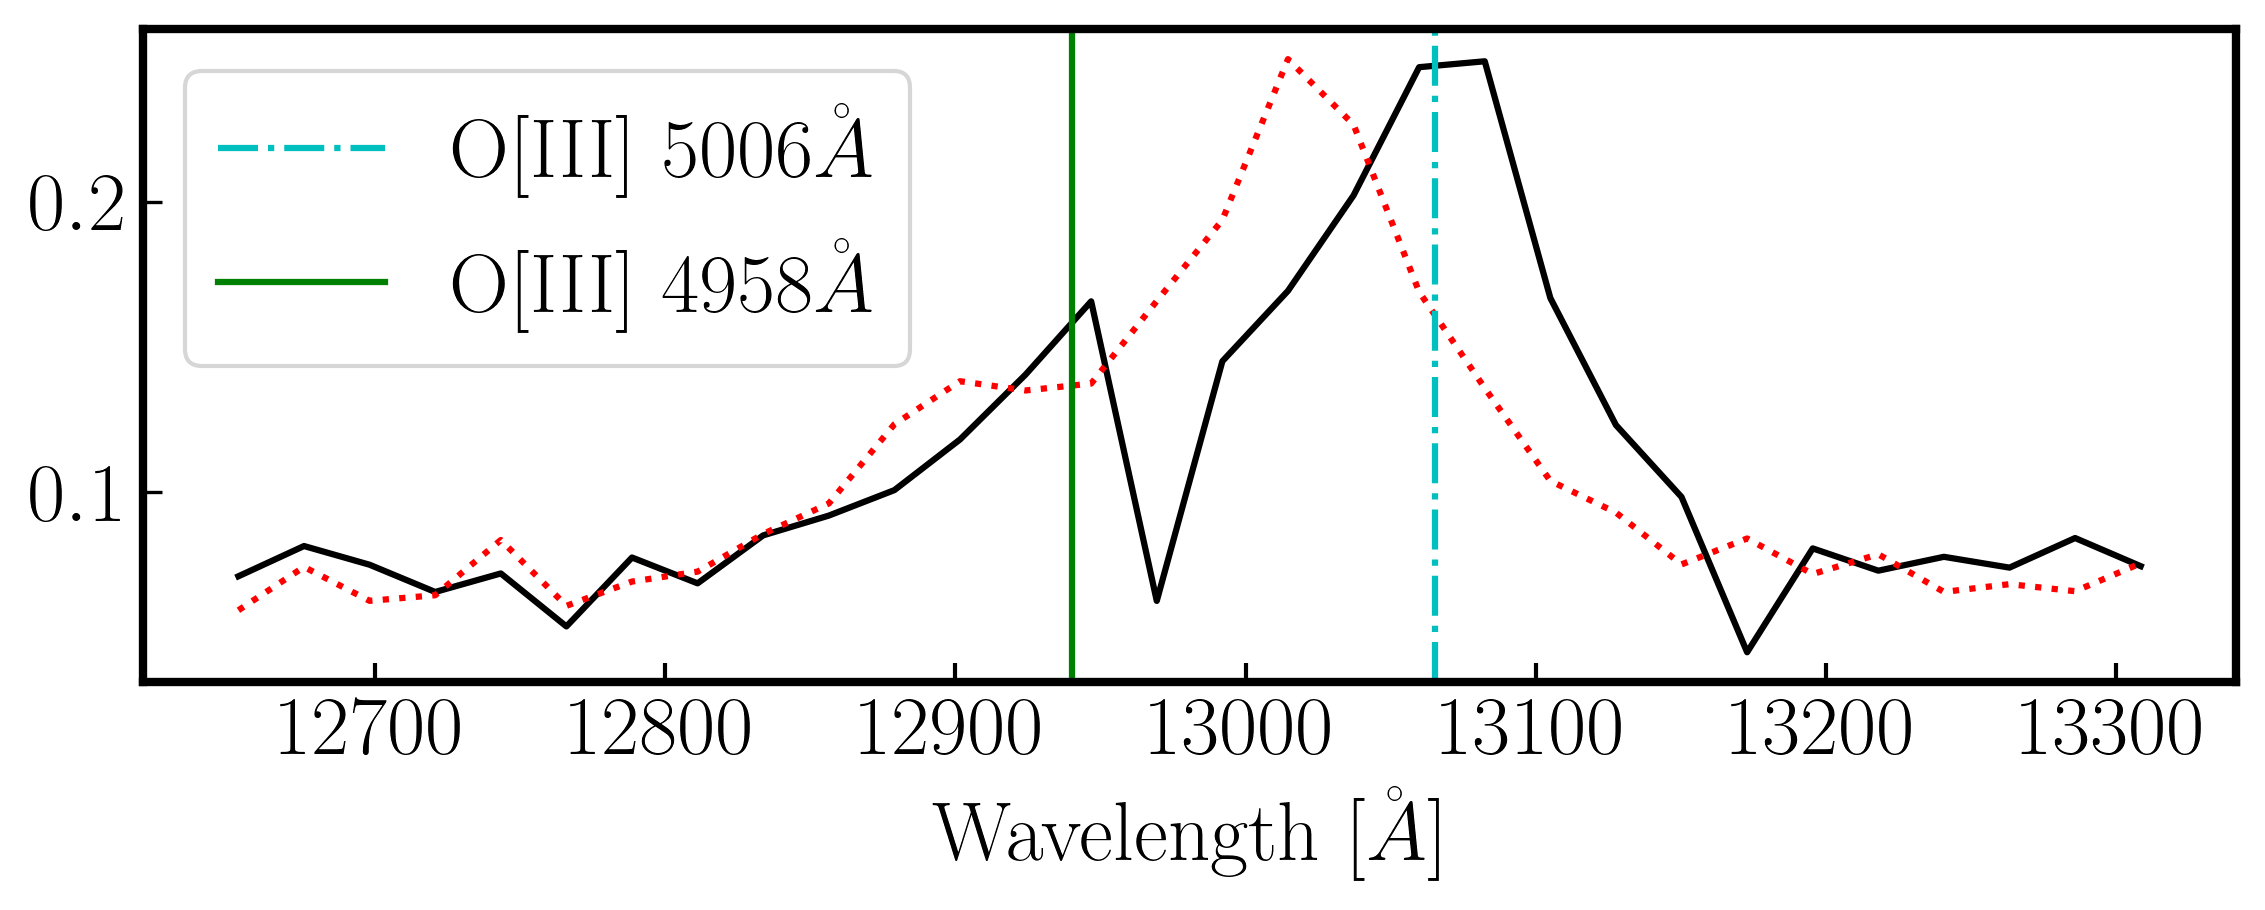

In [134]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(wl[110:140],ns,'k-')
ax.plot(wl[110:140],ss,'r:')
ax.axvline(O3_A_obs,ls='-.',c='c',label="O[III] 5006$\AA$")
ax.axvline(O3_B_obs,ls='-',c='g',label="O[III] 4958$\AA$")
ax.set_xlabel('Wavelength [$\AA$]')
ax.set_aspect(1000)
ax.legend()

## We did the fitting so this is just me testing
nsp_wl = wl_s[np.where(ns==ns.max())]
ssp_wl = wl_s[np.where(ss==ss.max())]

### Calculate the velocities

In [132]:
print("Obs frame OIII lines wavelengths [Angstroms]: %.3f, %.3f"%(O3_A_obs,O3_B_obs))

def doppler(wl,wl_0):
    return c.c*((wl-wl_0)/wl_0)[0]

ns_v = doppler(wl=nsp_wl,wl_0=O3_A_obs)
ss_v = doppler(wl=ssp_wl,wl_0=O3_A_obs)
vdiff = ns_v-ss_v

print("Velocities: North = %.2f km/s, South = %.2f km/s"%(ns_v/1e3,ss_v/1e3))
print("Velocity difference v1-v2 = %.2f km/s"%(vdiff/1e3))

Obs frame OIII lines wavelengths [Angstroms]: 13065.357, 12940.278
Velocities: North = 390.85 km/s, South = -1164.65 km/s
Velocity difference v1-v2 = 1555.50 km/s


### Calculate the model for the B-SMBH